# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [84]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [85]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [402]:
def P1(num_examples=5):
    ### STUDENT START ###
    for i in range(5):
        print("The following is the " + str(i + 1) + "th " "training example text: " + train_data[i])
        print()
        print("-> The label of the " + str(i + 1) + "th " + "training example is: " + str(train_labels[i]))
        print("---------------------------------------------")
        print("---------------------------------------------")
        print("---------------------------------------------")

        print()
    ### STUDENT END ###

P1(5)

The following is the 1th training example text: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

-> The label of the 1th training example is: 1
---------------------------------------------
---------------------------------------------
---------------------------------------------

The following is the 2th training example text: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [381]:
def P2():
    ## STUDENT START ###
    #     print(vectorizer)
    vectorizer = CountVectorizer(ngram_range=(1,1))
    vocab = vectorizer.fit_transform(train_data)
    print("Size of vocabulary " + str(vocab.shape[1]))
    non_zeros = []
    for v in vocab:
        non_zeros.append(v.nnz)
    print("Average number of non-zero features per example: " + str(np.mean(non_zeros)))
    print("Fraction of non-zero features in the matrix: " + str(np.sum(non_zeros) / (vocab.shape[0] * vocab.shape[1]))) #ASK!!!!
    features = vectorizer.get_feature_names()
    print("0th feature string: " + features[0])
    print("Last feature string: " + features[vocab.shape[1]-1])
    print("-----------")
    
    cv = CountVectorizer(train_data, vocabulary=["atheism", "graphics", "space", "religion"], ngram_range = (1,1))
    vocab = cv.transform(train_data)
    print("Size of vocabulary " + str(vocab.shape[1]))
    for v in vocab:
        non_zeros.append(v.nnz)
    print("Average number of non-zero features per example: " + str(np.mean(non_zeros)/vocab.shape[0]))
    print("------------")
    
    cv = CountVectorizer(ngram_range=(2,3), analyzer='char_wb')
    vocab = cv.fit_transform(train_data)
    print("Size of vocabulary " + str(vocab.shape[1]))
    print("--------------")
    
    cv = CountVectorizer(ngram_range=(1,1),min_df = 10)
    vocab = cv.fit_transform(train_data)
    print("Size of vocabulary " + str(vocab.shape[1]))
    print("---------------")
    
    vectorizer = CountVectorizer(ngram_range=(1,1))
    vocab_train = vectorizer.fit_transform(train_data)
    vocab_dev = vectorizer.fit_transform(dev_data)
    print("Number of words missing from training vocabulary: " + str(vocab_train.shape[1] - vocab_dev.shape[1]))

    ## STUDENT END ###
P2()

Size of vocabulary 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of non-zero features in the matrix: 0.0035978272269590263
0th feature string: 00
Last feature string: zyxel
-----------
Size of vocabulary 4
Average number of non-zero features per example: 0.023838356590856136
------------
Size of vocabulary 28954
--------------
Size of vocabulary 3064
---------------
Number of words missing from training vocabulary: 10633


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [398]:
def P3():
    ## STUDENT START ###
    vectorizer = CountVectorizer(ngram_range=(1,1))
    vocab_train = vectorizer.fit_transform(train_data)
    vocab_dev = vectorizer.transform(dev_data)
    
    print("Question 1:")
    best_score = -1
    best_n = 0
    for i in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(vocab_train, train_labels)
        pred = knn.predict(vocab_dev)
        score = metrics.f1_score(dev_labels, pred, average = "weighted")
        if (score > best_score):
            best_score = score
            best_n = i
        print("Score for KNN model with k = " + str(i) + " is: " + str(score))
    print("We found the 'n' value that maximizes f1 score to be n = " + str(best_n) + " with score = " + str(best_score))
    print ("-------------")
    
    print("Question 2:")
    alphas = np.linspace(start = 0.01, stop = 1, num = 10)
    best_score = -1
    best_alpha = -1
    for i in alphas:
        nb = MultinomialNB(alpha = i)
        nb.fit(vocab_train, train_labels)
        pred = nb.predict(vocab_dev)
        score = metrics.f1_score(dev_labels, pred, average = "weighted")
        if (score > best_score):
            best_score = score
            best_alpha = i
        print("Score for Naive Bayes model with alpha = " + str(i) + " is: " + str(score))
    print("We found the alpha value that maximizes f1 score to be alpha = " + str(best_alpha) + " with score = " + str(best_score))
    print ("-------------")
    print ("-------------")
    print("Question 3")
    cs = np.linspace(start = 0.1, stop = 10, num = 20)
    best_score = -1
    best_c = -1
    for c in cs:
        lr = LogisticRegression(C=c, solver="liblinear", multi_class="auto").fit(vocab_train, train_labels)
        pred = lr.predict(vocab_dev)
        score = metrics.f1_score(dev_labels, pred, average = "weighted")
        if (score > best_score):
            best_score = score
            best_c = c
        print("Score for Naive Bayes model with alpha = " + str(c) + " is: " + str(score))
        print("The weights for each topic are: ", lr.coef_)
        print("-------------------------------------------")
    print("We found the alpha value that maximizes f1 score to be alpha = " + str(best_c) + " with score = " + str(best_score))
        
    ## STUDENT END ###

P3()

Question 1:
Score for KNN model with k = 1 is: 0.3805030018531525
Score for KNN model with k = 2 is: 0.38054212404441684
Score for KNN model with k = 3 is: 0.4084150225437623
Score for KNN model with k = 4 is: 0.4031227993847515
Score for KNN model with k = 5 is: 0.4287607236218357
Score for KNN model with k = 6 is: 0.4466650540867595
Score for KNN model with k = 7 is: 0.45047910006117586
Score for KNN model with k = 8 is: 0.44698358117081094
Score for KNN model with k = 9 is: 0.4365666176198027
Score for KNN model with k = 10 is: 0.4278502905941064
We found the 'n' value that maximizes f1 score to be n = 7 with score = 0.45047910006117586
-------------
Question 2:
Score for Naive Bayes model with alpha = 0.01 is: 0.7751663218544357
Score for Naive Bayes model with alpha = 0.12 is: 0.7885466350292981
Score for Naive Bayes model with alpha = 0.23 is: 0.7890335791591067
Score for Naive Bayes model with alpha = 0.34 is: 0.787644978407044
Score for Naive Bayes model with alpha = 0.45 is: 0

ANSWER:
q1: We found the 'n' value that maximizes f1 score to be n = 7 with score = 0.45047910006117586

***
q2: We found the alpha value that maximizes f1 score to be alpha = 0.23 with score = 0.7890335791591067

***
q3: We found the alpha value that maximizes f1 score to be alpha = 0.6210526315789474 with score = 0.7001216140949633. Please see output above to see the weights for each topic for each value of C.

***
q4: Why doesn't k-Nearest Neighbors work well for this problem? This is because a single word can appear in many different sentences. We are trying to classify posts by topics, but a word can appear in many different contexts. For example the word, "a" can be used in the sentence, "a man died," as well as the sentence, "I bought a car." From the single word, "a," or even the nearest neighbors, it is not easy to classify the posts according to the topic.
***
q5: Why doesn't Logistic Regression work as well as Naive Bayes does? This is because Linear Regression uses all of the word features together to create a loss function, which it minimizes. However, Naive Bayes uses separate weights for each word instead of taking them into consideration together, which is likely to make it less biased than Linear Regression.
***
q6: What is the relationship between logistic regression's sum of squared weights vs. C value? Logistic regression's sum of squared weights increases as the C value increases.
***

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [197]:
def P4():
    ## STUDENT START ###
    cv = CountVectorizer(ngram_range=(2,2))
    vocab_train = cv.fit_transform(train_data)
    vocab_dev = cv.transform(dev_data)

    lr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr.fit(vocab_train, train_labels)
    weights = lr.coef_
    
    w, h = 5, 4;
    matrix = [[0 for x in range(w)] for y in range(h)] 
    for topic in range(4):
        features = weights[topic]
        sorted_features = np.argsort(features)
        top_features = sorted_features[:5]
        matrix[topic] = top_features
        
    w, h = 5, 4;
    feature_matrix = [[0 for x in range(w)] for y in range(h)] 
    for i in range(4):
        topic = matrix[i]
        for j in range(5):
            feature_index = topic[j]
            feature = cv.get_feature_names()[feature_index]
            feature_matrix[i][j] = feature
            
    print(feature_matrix)

    ## STUDENT END ###

P4()

[['looking for', 'want to', 'for the', 'in advance', 'interested in'], ['cheers kent', 'that the', 'the space', 'the moon', 'the bible'], ['cheers kent', 'the bible', 'looking for', 'you are', 'in this'], ['looking for', 'does anyone', 'on the', 'in advance', 'able to']]


ANSWER: 
- Top 5 features for topic 1 are: ['looking for', 'want to', 'for the', 'in advance', 'interested in']
- Top 5 features for topic 2 are: ['cheers kent', 'that the', 'the space', 'the moon', 'the bible']
- Top 5 features for topic 3 are: ['cheers kent', 'the bible', 'looking for', 'you are', 'in this']
- Top 5 features for topic 4 are: ['looking for', 'does anyone', 'on the', 'in advance', 'able to']

- Something surprising is that there are common features across topics. For example, topic 1 and 5 have 'looking for' as the top feature string.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [405]:
def better_preprocessor(s):
    ## STUDENT START ###
    
    stop_words = "i,me,my,myself,we,our,ours,ourselves,you,your,yours,yourself,yourselves,he,him,his,himself,she,her,hers,herself,it,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,should,now"
    stop_words = stop_words.split(',')
    s_copy = s.split(" ")
        
    new_words = []
    s_list = s.split()
    
    for w in s_list:
        w = re.sub('[^A-Za-z0-9]+', '', w)
        w = re.sub("[0-9]+", "zz", w)
        
        if w in stop_words:
            new_words.append("*")
        elif len(w) > 5:
            new_words.append(w[0:6])
        else:
            new_words.append(w)
    s = " ".join([w for w in new_words])
    
    return s.lower()
    

    
    
#     return s_new.lower()

def worse_preprocessor(s):
    return s
    ## STUDENT END ###

def P5():
    ## STUDENT START ###
    cv = CountVectorizer(ngram_range=(1,1), preprocessor= worse_preprocessor)
    vocab_train = cv.fit_transform(train_data)
    vocab_dev = cv.transform(dev_data)

    lr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr.fit(vocab_train, train_labels)
    pred = lr.predict(vocab_dev)
    f1_baseline = metrics.f1_score(dev_labels, pred, average = "weighted")
    print("Baseline F1 score is: " + str(f1_baseline))
    print("---------------")
    
    cv_better = CountVectorizer(ngram_range=(1,1), preprocessor= better_preprocessor)
    vocab_train_better = cv_better.fit_transform(train_data)
    vocab_dev_better = cv_better.transform(dev_data)

    lr = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    lr.fit(vocab_train_better, train_labels)
    pred_better = lr.predict(vocab_dev_better)
    f1_better = metrics.f1_score(dev_labels, pred_better, average = "weighted")
    print("Improved F1 score is: " + str(f1_better))
    print("----------------")
    print("Diff: " + str(f1_better - f1_baseline) + " > 0.02")
    print("----------------")
    print("The improved model reduced the vocabulary size by: " + str(vocab_train.shape[1] - vocab_train_better.shape[1]) + " words.")
    ## STUDENT END ###

P5()

Baseline F1 score is: 0.7069109185493502
---------------
Improved F1 score is: 0.7321855567785845
----------------
Diff: 0.02527463822923437 > 0.02
----------------
The improved model reduced the vocabulary size by: 14128 words.


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

f1 score of new model: 0.6724698334973492 for C = 1.0
Size of vocabulary: 1140
L1 regularization strength of new model: 1.0
------------------------------------------
f1 score of new model: 0.6903346175912822 for C = 2.0
Size of vocabulary: 1451
L1 regularization strength of new model: 0.5
------------------------------------------
f1 score of new model: 0.693229544002948 for C = 3.0
Size of vocabulary: 2114
L1 regularization strength of new model: 0.3333333333333333
------------------------------------------
f1 score of new model: 0.7003763328663624 for C = 4.0
Size of vocabulary: 2207
L1 regularization strength of new model: 0.25
------------------------------------------
f1 score of new model: 0.7003875514178898 for C = 5.0
Size of vocabulary: 2250
L1 regularization strength of new model: 0.2
------------------------------------------
f1 score of new model: 0.7004114940963463 for C = 6.0
Size of vocabulary: 3084
L1 regularization strength of new model: 0.16666666666666666
----------

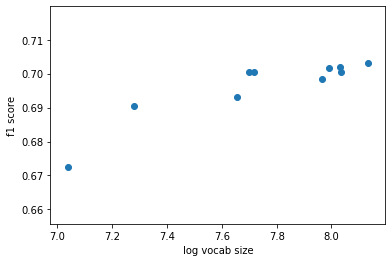

In [361]:
def P6():
#     Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ## STUDENT START ###
    f1_score = []
    vocab_size = []
    for c in np.linspace(1, 10, 10):
        cv = CountVectorizer(ngram_range=(1,1), preprocessor= None)
        vocab_train = cv.fit_transform(train_data)
        vocab_dev = cv.transform(dev_data)
        lr_L1 = LogisticRegression(C=c, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015)
        lr_L1.fit(vocab_train, train_labels)
        ("-----------") 
        features = cv.get_feature_names()
        non_zero_indices = []
        non_zero_words = []
        weights = np.array(lr_L1.coef_)
        for i in range(lr_L1.coef_.shape[1]):
            col = weights[:, i]
            non_zero = len(np.nonzero(col)[0]) > 0
            if (non_zero):
                non_zero_indices.append(i)
                non_zero_words.append(features[i])

        cv_l2 = CountVectorizer(ngram_range=(1,1), vocabulary= non_zero_words)
        vocab_train_l2 = cv_l2.fit_transform(train_data)
        vocab_dev_l2 = cv_l2.transform(dev_data)
        lr_L2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2")
        lr_L2.fit(vocab_train_l2, train_labels)
        pred = lr_L2.predict(vocab_dev_l2)
        score = metrics.f1_score(dev_labels, pred, average = "weighted")
        print("f1 score of new model: " + str(score) + " for C = " + str(c))
        print("Size of vocabulary: " + str(vocab_train_l2.shape[1]))
        print("L1 regularization strength of new model: " + str(1/c))
        vocab_size.append(vocab_train_l2.shape[1])
        f1_score.append(score)
        print("------------------------------------------")
    fig = plt.figure()    
    plt.scatter(x = np.log(vocab_size), y = f1_score)
    plt.xlabel("log vocab size")
    plt.ylabel("f1 score")
    ## STUDENT END ###

P6()

ANSWER:
- f1 score of new model: 0.6724698334973492 for C = 1.0
- Size of vocabulary: 1140
- L1 regularization strength of new model: 1.0
***
- f1 score of new model: 0.6903346175912822 for C = 2.0
- Size of vocabulary: 1451
- L1 regularization strength of new model: 0.5
***
- f1 score of new model: 0.693229544002948 for C = 3.0
- Size of vocabulary: 2114
- L1 regularization strength of new model: 0.3333333333333333
***
- f1 score of new model: 0.7003763328663624 for C = 4.0
- Size of vocabulary: 2207
- L1 regularization strength of new model: 0.25
***
- f1 score of new model: 0.7003875514178898 for C = 5.0
- Size of vocabulary: 2250
- L1 regularization strength of new model: 0.2
***
- f1 score of new model: 0.7004114940963463 for C = 6.0
- Size of vocabulary: 3084
- L1 regularization strength of new model: 0.16666666666666666
***
- f1 score of new model: 0.6984043808678763 for C = 7.0
- Size of vocabulary: 2880
- L1 regularization strength of new model: 0.14285714285714285
***
- f1 score of new model: 0.701540135960199 for C = 8.0
- Size of vocabulary: 2958
- L1 regularization strength of new model: 0.125
***
- f1 score of new model: 0.7019988382145393 for C = 9.0
- Size of vocabulary: 3077
- L1 regularization strength of new model: 0.1111111111111111
***
- f1 score of new model: 0.7031157885775385 for C = 10.0
- Size of vocabulary: 3401
- L1 regularization strength of new model: 0.1
***
How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary? 
- As we can see from the plot above, as log(vocabulary size) increases, so does the general trend of f1 score. Hence, The performance of the model based on the full vocabulary is better than the performance of the models based on the reduced vocabulariy.
***
### plot can be seen in cell output above

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [407]:
def P7():
    ## STUDENT START ###
    cv = TfidfVectorizer(ngram_range=(1,1))
    vocab_train = cv.fit_transform(train_data)
    vocab_dev = cv.transform(dev_data)
    lr = LogisticRegression(C=100, solver="liblinear", multi_class="auto", penalty="l2")
    lr.fit(vocab_train, train_labels)
    pred = lr.predict(vocab_dev)
    score = metrics.f1_score(dev_labels, pred, average = "weighted")
    print("-> f1 score is: " + str(score) + " for Linear Model with L2 regularization strength of 100")
    print("-----------------------------------------------------------")
    
    
    preds = lr.predict_proba(vocab_dev)
    rs = []
    for i in range(dev_labels.shape[0]):
        label = dev_labels[i]
        maximum = np.amax(preds[i])
        true_pred = preds[i][label]
        r = maximum / true_pred
        rs.append(r)
    
    highest = np.argmax(rs)
    rs[highest] = -1
    medium = np.argmax(rs)
    rs[medium] = -1
    small = np.argmax(rs)
    rs[small] = -1
    
    highest_text = dev_data[highest]
    medium_text = dev_data[medium]
    small_text = dev_data[small]
    
    print("Document with highest R score:")
    print(highest_text)
    print("----------------------------------------------------------")
    print()
    print("Document with second highest R score:")
    print(medium_text)
    print("----------------------------------------------------------")
    print()
    print("Document with third highest R score:")
    print(small_text)
    print("----------------------------------------------------------")

    ## STUDENT END ###

P7()

-> f1 score is: 0.7597662427853104 for Linear Model with L2 regularization strength of 100
-----------------------------------------------------------
Document with highest R score:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not cha

ANSWER:
- f1 score is: 0.7597662427853104 for Linear Model with L2 regularization strength of 100
***
- see cell output for the 3 documents with highest R scores ^^.
***
- How is TfidfVectorizer different than CountVectorizer: TfidfVectorizer returns floats while the CountVectorizer returns ints. This is because TfidfVectorizer assigns a score (similar to a weighted average), whereas CountVectorizer assigns counts according to the occurence of vocabulary.
***
- Explain what the R ratio describes. R ratio describes how far off our estimate was. If maximum predicted probability = predicted probability of correct label, then R score = 1. This means a value 1 of R score means our model was correct in identifying the topic. However, the higher the R score, the higher our estimate was in guessing the incorrect topic.  
***
- What kinds of mistakes is the model making?  The model is making errors especially with guessing documents with numerical values included. The top and 3rd highest R-scored documents both have numerical values in them, and they are both classifies incorrectly. Furthermore, in the first document we see an address used. Peraps the names of the streets are leading to misclassification.
***
- Suggest a way to address one particular issue that you see. One suggestion to fix the problem of wrongly identifying documents with addresses would be to introduce a bag of words of just names into the model. To address the issue of numerical values leading missclassification, we could preprocess texts to assign numbers to a specific value. That way each digit or number will not have predictive power over another number. We could also do a similar thing with proper names, such as "Lynn Matthews Anderson." Names likely are not very compelling reasons to classify a document to a certain topic, so it might be wise to neutralize  names. 

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.